In [1]:
import numpy as  np
import pandas as pd
import  matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
df=pd.read_csv("train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


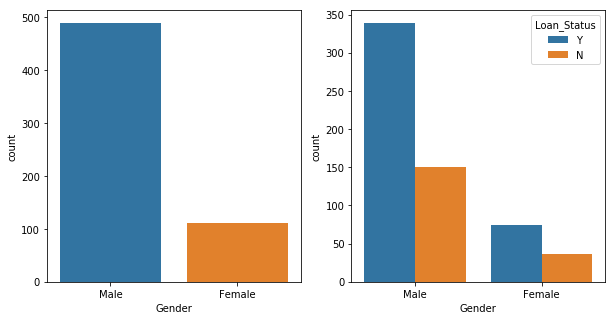

In [61]:
%matplotlib inline
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.countplot(df["Gender"],data=df,ax=axis1)
sns.countplot(df["Gender"],hue="Loan_Status",data=df,ax=axis2)


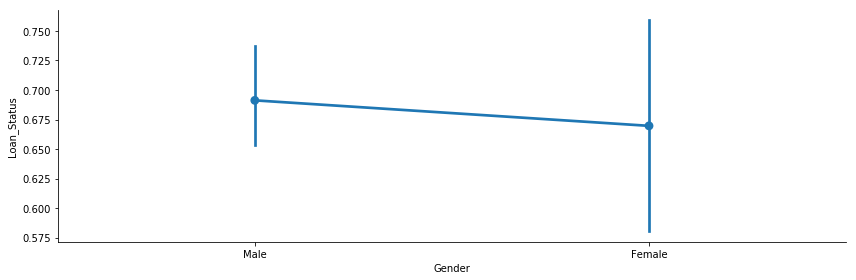

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender.fillna("Male",inplace=True)
df.Loan_Status=le.fit_transform(df.Loan_Status)
sns.factorplot("Gender","Loan_Status",data=df,height=4,aspect=3)



In [63]:
df.Gender=le.fit_transform(df.Gender)

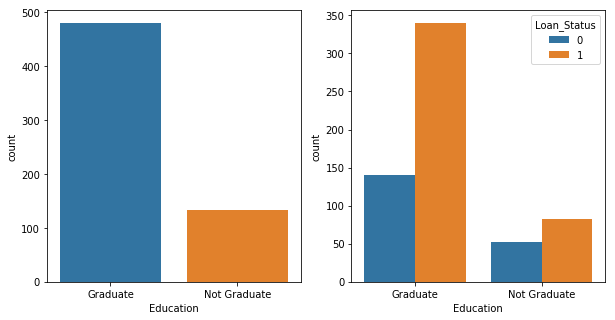

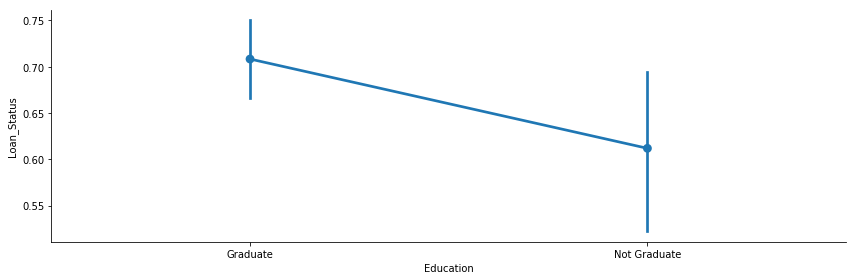

In [64]:

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.countplot(df["Education"],data=df,ax=axis1)
sns.countplot(df["Education"],hue="Loan_Status",data=df,ax=axis2)
sns.factorplot("Education","Loan_Status",data=df,height=4,aspect=3)

In [65]:
df.Education=le.fit_transform(df.Education)
df.Property_Area=le.fit_transform(df.Property_Area)

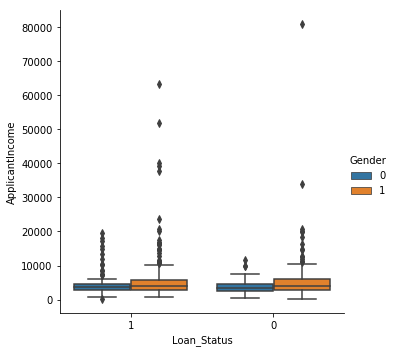

In [66]:
sns.factorplot("Loan_Status","ApplicantIncome",hue="Gender",data=df,kind="box",order=[1,0])

In [67]:
q1=np.quantile(df.ApplicantIncome,.25,interpolation='midpoint')
q3=np.quantile(df.ApplicantIncome,.75,interpolation='midpoint')
iqr=q3-q1
print(q1,q3,iqr)
out=df[["ApplicantIncome","Loan_Status","Gender"]][~((df["ApplicantIncome"]<(q1-iqr)) | (df["ApplicantIncome"]>(q3+iqr)))]
out.describe()

2879.0 5790.0 2911.0


,ApplicantIncome,Loan_Status,Gender
count,542.000000,542.000000,542.000000
mean,3906.832103,0.688192,0.815498
std,1624.071130,0.463660,0.388251
min,150.000000,0.000000,0.000000
25%,2701.250000,0.000000,1.000000
50%,3577.500000,1.000000,1.000000
75%,4802.250000,1.000000,1.000000
max,8666.000000,1.000000,1.000000


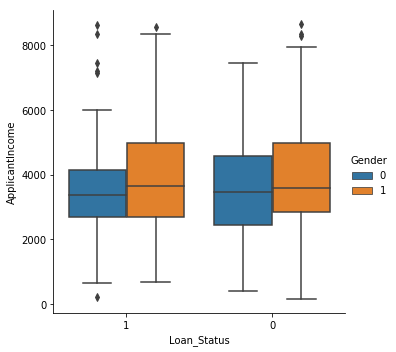

In [68]:
sns.factorplot("Loan_Status","ApplicantIncome",kind="box",data=out,hue="Gender",order=[1,0])

In [69]:
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
df.Married=le.fit_transform(df.Married)
df.Dependents=le.fit_transform(df.Dependents)
df.Self_Employed=le.fit_transform(df.Self_Employed)


df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [70]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)
df.Credit_History.fillna(df.Credit_History.mean(),inplace=True)


In [71]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.6+ KB


In [73]:
df=normalize(df.drop("Loan_ID",axis=1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [76]:

Y=df.Loan_Status
X=df.drop(["Loan_Status"],axis=1)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
rml=RandomForestClassifier(n_estimators=20)
lml=LogisticRegression()
sm=SVC()
kf=StratifiedKFold(n_splits=50)



In [78]:
rr=float(0)
for i in range(0,10):
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.05)
 rml.fit(X_train,Y_train)
 rr=rr+rml.score(X_test,Y_test)
print(rr/10)

0.7903225806451615


In [79]:
from sklearn.model_selection import cross_val_score as cvs
scores=cvs(rml,X,Y,cv=10)
print("rml= "+str(scores.mean()))
scores=cvs(sm,X,Y,cv=10)
print("sm= "+str(scores.mean()))
scores=cvs(lml,X,Y,cv=10)
print("lml= "+str(scores.mean()))

rml= 0.7850117096018735
sm= 0.8094457455113192
lml= 0.8094457455113192


In [80]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=15, n_estimators=1000, learning_rate=0.005)
rr=float(0)
for i in range(0,10):
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.05)
 model.fit(X_train,Y_train)
 rr=rr+model.score(X_test,Y_test)
print(rr/10)

0.7612903225806453


In [93]:
import lightgbm as lgb
d_train = lgb.Dataset(X, label=Y)
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
num_round=50
lgbm=lgb.train(param,d_train,num_round)
ypred2=lgbm.predict(X)

In [121]:
ypred2.size

614

In [113]:
for i in range(ypred2.size):
    if ypred2[i]>.5:
        ypred2[i]=1
    else:
        ypred2[i]=0


In [120]:
np.asarray(Y).size
sum(abs(ypred2-np.asarray(Y)))

100.0

In [122]:
score=((ypred2.size-sum(abs(ypred2-np.asarray(Y))))/(ypred2.size)*100)
score

83.71335504885994

In [123]:
scores=cvs(model,X,Y,cv=2)
print("Xgbscore{}".format(scores))

Xgbscore[0.76221498 0.76547231]


In [125]:
import pickle as pkl


In [128]:
pkl.dump(lgbm,open("model.pkl","wb"))